In [1]:
import csv
import numpy as np
import matplotlib.pyplot as p
import math
import os
from os import walk
import scipy.io as sio

folder = r'C:\Users\zomege\Documents\Machine Learning\Matlab\Training_Data_(Line_06)\\'

In [7]:
#Header of csv
#Date[0],Time[1],Depth of Airgun(m)[2],Depth of Reciever(m)[3],X Airgun[4],Y Airgun[5],Z Airgun[6],X_R1[7],Y_R1[8],Z_R1[9],SEL[10],RMS[11]
#Python array
#Depth of Airgun(m)[0],Depth of Reciever(m)[1],Range(m)[2],SEL[3],RMS[4]
saveLoc = r'C:\Users\zomege\Documents\Machine Learning\data.mat'
if(not(os.path.isfile(saveLoc))):
    files = os.listdir(folder)
    length = len(files)
    data = np.zeros([636*length,5])
    i = 0
    for filename in files:
        dirname = folder+filename
        if filename.endswith(".csv"): 
            with open(dirname) as csvFile:
                csvReader = csv.reader(csvFile)
                next(csvReader,None)#Skip header
                for row in csvReader:
                    range1 = math.sqrt((float(row[7])-float(row[4]))**2+(float(row[8])-float(row[5]))**2)#range = dist([X_R1,Y_R1],[X_Airgun,Y_airgun])
                    data[i] = [row[2],row[3],range1,row[10],row[11]]
                    i = i + 1 
    sio.savemat(saveLoc, mdict={'data': data})
else:
    save = sio.loadmat(saveLoc)
    data = save['data']

[[  2.61760000e+03  -9.99990000e+04   5.18073751e+06   1.50850200e+02
    1.53526300e+02]
 [  2.61760000e+03  -9.99990000e+04   5.18072556e+06   1.51126900e+02
    1.54000400e+02]
 [  2.61760000e+03  -9.99990000e+04   5.18071351e+06   1.51878000e+02
    1.54819300e+02]
 ..., 
 [  1.01700000e+02   1.04100000e+02   5.19177569e+06   1.56496000e+02
    1.62087000e+02]
 [  1.01700000e+02   1.04100000e+02   5.19177103e+06   1.56744000e+02
    1.62272500e+02]
 [  1.01700000e+02   1.04100000e+02   5.19176636e+06   1.05186100e+02
    1.11606800e+02]]


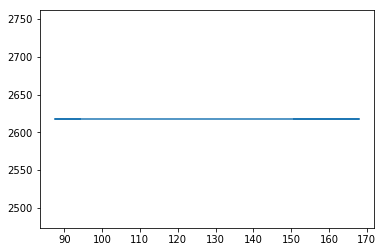

In [64]:
p.plot(shot[:,3],shot[:,0])
p.show()
